Dataset Preview:
    Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9

Missing Values:
 Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64


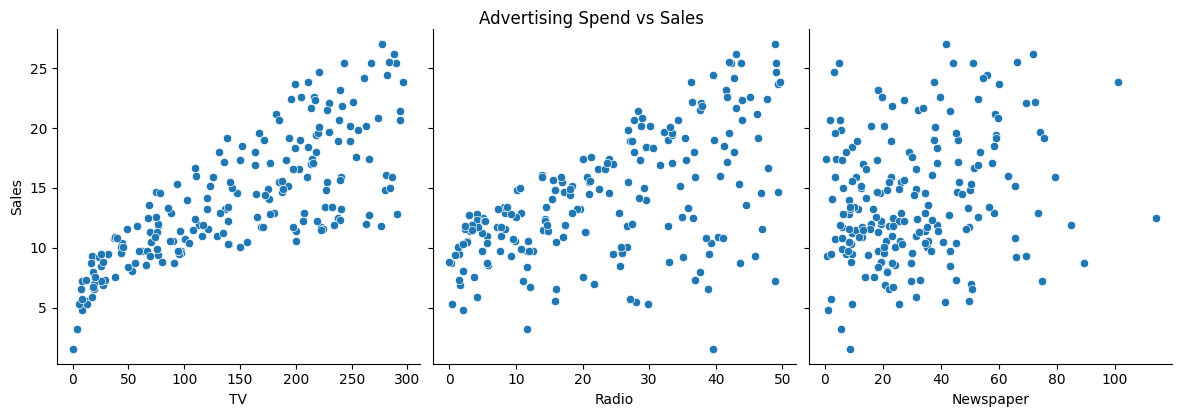

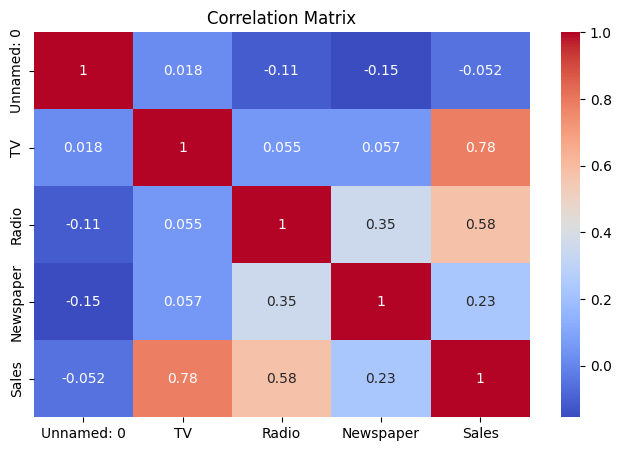


Model Coefficients: [0.04472952 0.18919505 0.00276111]
Model Intercept: 2.9790673381226256
R-squared: 0.899438024100912
Mean Squared Error: 3.174097353976104


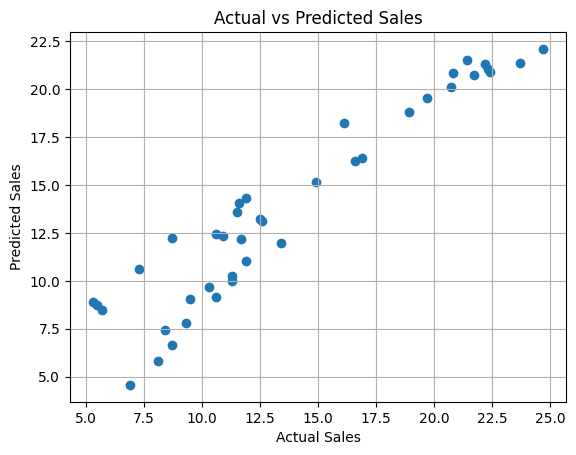

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv('Advertising.csv')

# Display first few rows
print("Dataset Preview:\n", df.head())

# Check for null values
print("\nMissing Values:\n", df.isnull().sum())

# Exploratory Data Analysis
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.suptitle("Advertising Spend vs Sales", y=1.02)
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Define features and target
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("\nModel Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)
print("R-squared:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

# Plot actual vs predicted sales
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.grid(True)
plt.show()
